# Hypothesis Testing

In [195]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f # remove
from scipy.stats import f_oneway
import statsmodels.api as sm # remove
from statsmodels.formula.api import ols # remove

In [196]:
# load country_data dataset from csv files into dataframe
country = pd.read_csv("datasets/country_data.csv")

In [197]:
# get the first five rows of the country dataframe
country.head()

,Unnamed: 0,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
0,9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
1,10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
2,11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
3,12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
4,13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09


In [198]:
# get the summary statistics for the country dataframe
country.describe()

,Unnamed: 0,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
count,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02
mean,174.826667,2015.626667,501.873333,2.740963e+05,112.260000,1.498089e+07,3.138351e+09,3.814688e+09
std,98.687749,2.515847,94.155968,4.234211e+05,53.613385,2.157131e+07,4.195269e+09,5.876872e+09
min,9.000000,2012.000000,301.000000,3.238000e+03,46.000000,5.248530e+05,1.922000e+08,1.631000e+08
25%,93.250000,2013.000000,431.000000,1.969500e+04,74.000000,2.797863e+06,4.035000e+08,4.106782e+08
50%,171.500000,2015.500000,513.000000,6.879000e+04,104.000000,5.552904e+06,1.037605e+09,1.648500e+09
75%,229.750000,2018.000000,563.750000,2.716442e+05,129.000000,9.825102e+06,3.523378e+09,3.915846e+09
max,356.000000,2020.000000,682.000000,1.783232e+06,283.000000,6.748553e+07,1.602470e+10,2.373355e+10


In [199]:
# create mapping dictionary to assign each country to it's respective European region
country_to_region = {
    'Austria': 'Central Europe',
    'Bulgaria': 'Eastern Europe',
    'Switzerland': 'Central Europe',
    'Denmark': 'Northern Europe',
    'Estonia': 'Northern Europe',
    'Finland': 'Northern Europe',
    'France': 'Western Europe',
    'Croatia': 'Eastern Europe',
    'Hungary': 'Central Europe',
    'Ireland': 'Western Europe',
    'Italy': 'Southern Europe',
    'Lithuania': 'Eastern Europe',
    'Luxembourg': 'Western Europe',
    'Latvia': 'Northern Europe',
    'Norway': 'Northern Europe',
    'Poland': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Sweden': 'Northern Europe',
    'Slovenia': 'Central Europe',
    'United Kingdom': 'Western Europe'
}

In [200]:
# create 'region' column in country dataframe and map newly defined regional country values
country['region'] = country['country'].map(country_to_region)

In [201]:
# get first five rows of updated country dataframe
country.head()

,Unnamed: 0,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,region
0,9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,Central Europe
1,10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,Central Europe
2,11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,Central Europe
3,12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,Central Europe
4,13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,Central Europe


Text(0.5, 1.0, 'GDP Per Capita by European Regions')

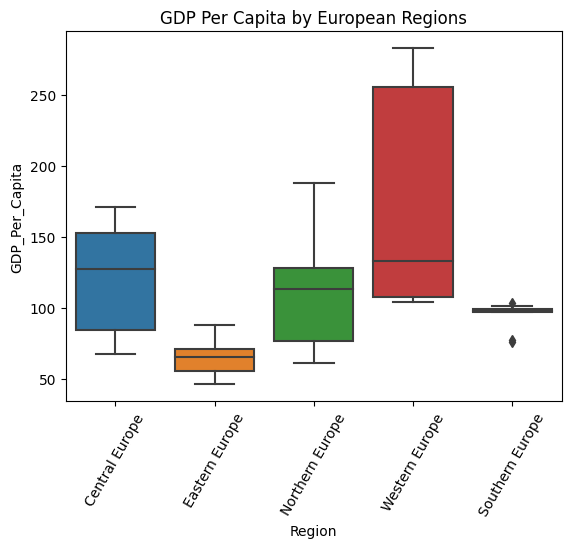

In [202]:
# get boxplot of gdp_per_capita by region
sns.boxplot(data=country, x='region', y='gdp_per_capita')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('GDP_Per_Capita')
plt.title('GDP Per Capita by European Regions')

In [203]:
# create new variable to group data by regions
group_regions = country.groupby('region')
# group_regions.head()

In [204]:
# make a list for each region with their gdp values
central_eu_gdp = []
western_eu_gdp = []
eastern_eu_gdp = []
southern_eu_gdp = []
northern_eu_gdp = []

for temp, region in group_regions:
    if temp == 'Central Europe':
        central_eu_gdp.extend(region['gdp_per_capita'])
    elif temp == 'Western Europe':
        western_eu_gdp.extend(region['gdp_per_capita'])
    elif temp == 'Eastern Europe':
        eastern_eu_gdp.extend(region['gdp_per_capita'])
    elif temp == 'Southern Europe':
        southern_eu_gdp.extend(region['gdp_per_capita'])
    elif temp == 'Northern Europe':
        northern_eu_gdp.extend(region['gdp_per_capita'])

### ANOVA Test: Is there a significant difference among regional gdp per capita?

Null hypothesis: There is no significant difference in gdp per capita across the five regions
Alt. hpothesis: There is a significant difference in gdp per capita across the five regions

p-value = 0.05

In [205]:
# perform oneway ANOVA to determine if there is a significant difference in regional gdp per capita
f_stat, p_value = f_oneway(central_eu_gdp, western_eu_gdp, eastern_eu_gdp, southern_eu_gdp, northern_eu_gdp)
print(f_stat, p_value)

27.25486610972865 7.12912058998163e-17


Our resulting p-value of 7.12912058998163e-17 is less than our alpha of 0.05. Therefore, we reject the null hypothesis and accept there is a significant difference in gdp per capita across the give European regions.

What if we just compare two regions? Let's use Central Europe as our base and interchange the other 4 regions to see if there is a significant difference in gdp per capita between two regions.

In [210]:
# perform oneway ANOVA to determine if there is a significant difference in gdp per capita between central and western EU
f_stat, p_value = f_oneway(central_eu_gdp, western_eu_gdp)
print(f_stat, p_value)

11.735617877878271 0.0011325687132020005


Our resulting p-value of 0.0011325687132020005 is less than our alpha of 0.05. Therefore, we reject the null hypothesis and accept that there is a significant difference in gdp per capita between central and western europe.

In [211]:
# perform oneway ANOVA to determine if there is a significant difference in gdp per capita between central and eastern EU
f_stat, p_value = f_oneway(central_eu_gdp, eastern_eu_gdp)
print(f_stat, p_value)

68.40751244814592 1.6930726947861872e-11


Our resulting p-value of 1.6930726947861872e-11 is less than our alpha of 0.05. Therefore, we reject the null hypothesis and accept that there is a significant difference in gdp per capita between central and eastern europe.

In [212]:
# perform oneway ANOVA to determine if there is a significant difference in gdp per capita between central and southern EU
f_stat, p_value = f_oneway(central_eu_gdp, southern_eu_gdp)
print(f_stat, p_value)

4.553952692895784 0.03953601328451004


Our resulting p-value of 0.03953601328451004 is less than our alpha of 0.05. Therefore, we reject the null hypothesis and accept that there is a significant difference in gdp per capita between central and southern europe.

In [209]:
# perform oneway ANOVA to determine if there is a significant difference in gdp per capita between central and northern EU
f_stat, p_value = f_oneway(central_eu_gdp, northern_eu_gdp)
print(f_stat, p_value)

2.083925574043586 0.15307720396985192


Our resulting p-value of 0.15307720396985192 is greater than our alpha of 0.05. Therefore, we accept the null hypothesis that there is no significant difference in gdp per capita between central and northern europe.